# Generating And Fitting Regression Data

##### Keywords: multi-variate normal, linear regression, correlation

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## A trick to generate data

We generate data from a gaussian with standard deviation 1 and means given by:

$$\mu_i = 0.15 x_{1,i} - 0.4 x_{2,i}, y \sim N(\mu, 1).$$

This is a **2 parameter** model.

We use an interesting trick to generate this data, directly using the regression coefficients as correlations with the response variable.

Lets start in 2D

In [15]:
rho=[0.15, -0.4] # correlation with y
n_dim = 1 + len(rho)
Rho = np.eye(n_dim)
for i,r in enumerate(rho):
    Rho[0, i+1] = r
Rho

array([[ 1.  ,  0.15, -0.4 ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ]])

In [16]:
index_lower = np.tril_indices(n_dim, -1)
Rho[index_lower] = Rho.T[index_lower]
Rho

array([[ 1.  ,  0.15, -0.4 ],
       [ 0.15,  1.  ,  0.  ],
       [-0.4 ,  0.  ,  1.  ]])

In [21]:
mean = n_dim * [0.]
samples = np.random.multivariate_normal(mean, Rho, size=100)
samples

array([[ 0.84829468,  1.86357579, -0.39473678],
       [-0.2201655 ,  0.10651643,  0.88117214],
       [-0.4694467 ,  1.01881081,  0.61019291],
       [ 0.97238626,  0.97415043, -0.69144442],
       [-0.18560854,  0.10045763, -0.76464303],
       [-1.70293835, -1.31029031,  1.06756914],
       [ 0.67821329,  1.9591632 , -1.06810272],
       [-1.25007846,  0.60104172,  0.41335409],
       [ 1.38362573, -0.20020628, -1.27849534],
       [ 1.42074458, -0.06381162,  1.25155729],
       [-0.71426815,  0.67477458,  0.38833928],
       [-0.58061311,  0.33207564,  0.02361399],
       [-0.59322056, -1.36695479,  0.63820656],
       [ 0.14823059,  1.17110299, -0.34436122],
       [ 0.63092864,  0.71524888, -0.68165195],
       [ 0.29954188,  1.28327759, -0.06481651],
       [-0.38609811, -0.70228668,  1.47769783],
       [-0.2830174 ,  1.36178387, -1.41310613],
       [-0.16544907, -0.19139881, -0.39996352],
       [-0.57846011,  1.5933223 ,  0.89445915],
       [-0.71243852, -0.62190687,  1.330

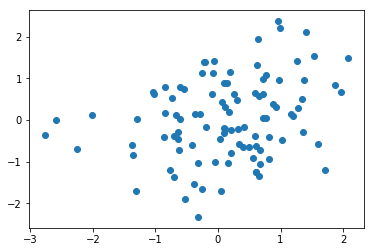

In [22]:
plt.scatter(samples[:,1], samples[:,0]) #marginal

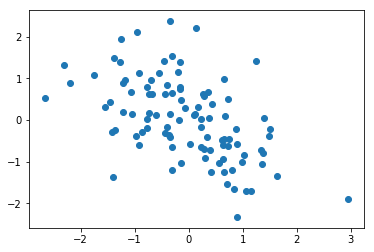

In [23]:
plt.scatter(samples[:,2], samples[:,0]) #marginal

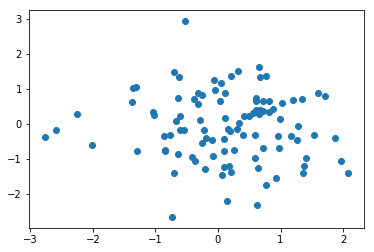

In [24]:
plt.scatter(samples[:,1], samples[:,2]) #marginal

In [45]:
def calculate_corr_matrix(k, rho):
    n_dim = 1 + len(rho)
    if n_dim < k:
        n_dim = k
    Rho = np.eye(n_dim)
    for i,r in enumerate(rho):
        Rho[0, i+1] = r
    index_lower = np.tril_indices(n_dim, -1)
    Rho[index_lower] = Rho.T[index_lower]
    return Rho, n_dim

In [46]:
calculate_corr_matrix(2, [0.15, -0.4])

(array([[ 1.  ,  0.15, -0.4 ],
        [ 0.15,  1.  ,  0.  ],
        [-0.4 ,  0.  ,  1.  ]]), 3)

In [47]:
calculate_corr_matrix(3, [0.15, -0.4])

(array([[ 1.  ,  0.15, -0.4 ],
        [ 0.15,  1.  ,  0.  ],
        [-0.4 ,  0.  ,  1.  ]]), 3)

In [48]:
calculate_corr_matrix(4, [0.15, -0.4])

(array([[ 1.  ,  0.15, -0.4 ,  0.  ],
        [ 0.15,  1.  ,  0.  ,  0.  ],
        [-0.4 ,  0.  ,  1.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  1.  ]]), 4)

In [49]:
calculate_corr_matrix(5, [0.15, -0.4])

(array([[ 1.  ,  0.15, -0.4 ,  0.  ,  0.  ],
        [ 0.15,  1.  ,  0.  ,  0.  ,  0.  ],
        [-0.4 ,  0.  ,  1.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ]]), 5)

In [59]:
def generate_data(N, k, rho=[0.15, -0.4]):
    Rho, n_dim = calculate_corr_matrix(k, rho)
    mean = n_dim * [0.]
    Xtrain = np.random.multivariate_normal(mean, Rho, size=N)
    Xtest = np.random.multivariate_normal(mean, Rho, size=N)
    ytrain = Xtrain[:,0].copy()
    Xtrain[:,0]=1.
    ytest = Xtest[:,0].copy()
    Xtest[:,0]=1.
    #print(Xtrain)
    #print(Xtrain.shape, Xtrain[:,:k].shape)
    return Xtrain[:,:k], ytrain, Xtest[:,:k], ytest

We want to generate data for 5 different cases, a one parameter (intercept) fit, a two parameter (intercept and $x_1$), three parameters (add a $x_2), and four and five parameters. Here is what the data looks like for 2 and 3 parameters:

In [60]:
generate_data(5,2)

(array([[ 1.        ,  0.78804338],
        [ 1.        , -0.17559308],
        [ 1.        ,  2.61106682],
        [ 1.        ,  0.16187352],
        [ 1.        ,  0.94676314]]),
 array([ 0.66633307,  0.09760313,  1.05121673, -0.99508296, -1.2087932 ]),
 array([[ 1.        ,  0.55519384],
        [ 1.        ,  0.07493834],
        [ 1.        , -1.7226416 ],
        [ 1.        ,  0.27709465],
        [ 1.        ,  0.78917846]]),
 array([ 0.69627859,  0.97390882,  1.71695311, -1.7152763 , -0.04044233]))

In [64]:
generate_data(5,3)

(array([[ 1.        , -1.36143601,  0.03148762],
        [ 1.        ,  1.12974765, -0.49766819],
        [ 1.        , -0.53260886, -0.57664704],
        [ 1.        ,  0.20249861, -0.19959547],
        [ 1.        ,  0.90036475,  0.50690876]]),
 array([-1.48977234, -0.59190736, -0.40522914, -0.91222955, -1.70553949]),
 array([[ 1.        , -1.64668283, -1.80285072],
        [ 1.        , -0.10180807,  0.91731483],
        [ 1.        , -0.13906829, -1.55263645],
        [ 1.        , -2.11138676,  0.22651539],
        [ 1.        , -0.8860697 , -1.35889235]]),
 array([ 1.31449753,  0.69134707,  1.78590081,  0.10361084,  1.95151795]))

And for four and 5 parameters

In [69]:
generate_data(5,4)

(array([[ 1.        ,  0.15021561,  1.69863925, -1.2804319 ],
        [ 1.        ,  0.08304854,  1.14454472,  0.33821796],
        [ 1.        ,  0.68227058,  0.6163912 , -1.5910914 ],
        [ 1.        , -1.10381808, -0.88655867, -0.08370383],
        [ 1.        ,  0.19388402,  0.59994127, -0.62826231]]),
 array([-0.73357551, -1.66825412, -0.23778661, -1.05959313,  1.20576895]),
 array([[ 1.        ,  1.97511727, -0.50345436, -0.01065413],
        [ 1.        ,  0.95802976,  0.80566122,  1.78646255],
        [ 1.        ,  0.54619592, -1.01789944,  1.88597392],
        [ 1.        ,  0.64961521, -1.22012602,  1.12468855],
        [ 1.        ,  0.44773808,  1.19129354,  0.03779606]]),
 array([ 1.27321518, -0.64355957,  0.93028705,  1.90772648, -0.42072479]))

In [70]:
generate_data(5,5)

(array([[ 1.        ,  0.27817718,  0.59341622, -0.33465159, -2.58984203],
        [ 1.        , -1.15578301,  0.11206437,  0.56905775,  0.05500154],
        [ 1.        , -0.69974996,  1.37556309,  1.55261713, -0.61371482],
        [ 1.        ,  0.8837714 ,  0.04687932, -0.59032411,  0.27833392],
        [ 1.        , -0.49619511,  0.81998447,  0.9305664 ,  1.34997944]]),
 array([-2.80059115,  0.21019808, -0.9332254 , -0.2448186 ,  0.35210238]),
 array([[ 1.        , -0.47399572, -3.13636432, -0.47067828, -1.03602178],
        [ 1.        ,  0.11283849, -0.28687251, -0.29365302, -0.09671533],
        [ 1.        , -0.0811073 ,  0.72964077, -0.992109  ,  0.22584973],
        [ 1.        ,  0.69415671, -0.14770833, -1.42307707,  0.71640962],
        [ 1.        , -1.20924232, -1.80826492,  0.55658883, -2.83933828]]),
 array([ 0.77906954,  0.70536224, -2.08137173, -1.59671007,  0.30048861]))

In [63]:
from scipy.stats import norm
import statsmodels.api as sm

## Analysis, n=20

Here is the main loop of our analysis. We take the 5 models we talked about. For each model we generate 10000 samples of the data, split into an equal sized (N=20 each) training and testing set. We fit the regression on the training set, and calculate the **deviance** on the training set. 

What is **deviance**. We will come to the concept of deviance soon, but for now, its just 

$$ Deviance  =  -2 \times \ell  =  -2 \times log({\cal L}) ,$$

computed over the data set in question.

Thus the Deviance is just a loss function.

Notice how we have simply used the `logpdf` from `scipy.stats`. You can easily do this for other distributions.

We then use the fit to calculate the $\mu$ on the test set, and calculate the deviance there. We then find the average and the standard deviation across the 10000 simulations.

Why do we do 10000 simulations? These are our **multiple samples from some hypothetical population**.

In [73]:
reps=10000
results_20 = {}
for k in range(1,6):
    trdevs=np.zeros(reps)
    tedevs=np.zeros(reps)
    for r in range(reps):
        Xtr, ytr, Xte, yte = generate_data(20, k)
        ols = sm.OLS(ytr, Xtr).fit()
        mutr = np.dot(Xtr, ols.params)
        devtr = -2*np.sum(norm.logpdf(ytr, mutr, 1))
        mute = np.dot(Xte, ols.params)
        #print(mutr.shape, mute.shape)
        devte = -2*np.sum(norm.logpdf(yte, mute, 1))
        #print(k, r, devtr, devte)
        trdevs[r] = devtr
        tedevs[r] = devte
    results_20[k] = (np.mean(trdevs), np.std(trdevs), np.mean(tedevs), np.std(tedevs))

In [74]:
import pandas as pd
df = pd.DataFrame(results_20).T
df = df.rename(columns = dict(zip(range(4), ['train', 'train_std', 'test', 'test_std'])))
df

,train,train_std,test,test_std
1,55.814482,6.095473,57.696594,6.678535
2,54.364176,5.953622,58.473285,7.154725
3,50.736528,4.831665,55.947967,6.708852
4,49.812125,4.638089,57.396140,7.605612
5,49.088703,4.480338,58.820134,8.512742


In [75]:
import seaborn.apionly as sns
colors = sns.color_palette()
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

We plot the traing and testing deviances

//anaconda/envs/py3l/lib/python3.6/site-packages/matplotlib/axes/_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


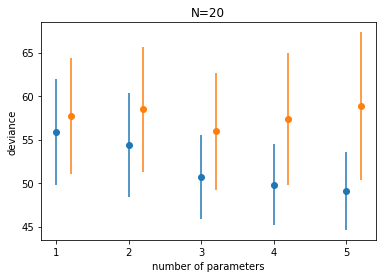

In [76]:
plt.plot(df.index, df.train, 'o', color = colors[0])
plt.errorbar(df.index, df.train, yerr=df.train_std, fmt=None, color=colors[0])
plt.plot(df.index+0.2, df.test, 'o', color = colors[1])
plt.errorbar(df.index+0.2, df.test, yerr=df.test_std, fmt=None, color=colors[1])
plt.xlabel("number of parameters")
plt.ylabel("deviance")
plt.title("N=20");

This is just an illustration of the training vs testing structure we saw in class, along with the randomness that comes from sampling and noise. (Indeed, here, because of the way we generated the data, the randomness from both the sampling and the noise are explicitly included).

Notice:

- the best fit model may not be the original generating model. Remember that the choice of fit depends on the amount of data you have and the less data you have, the less parameters you should use
- on average, out of sample deviance must be larger than in-sample deviance, through an individual pair may have that order reversed because of sample peculiarity.

If you subtract the average losses between the test and training set, you find something interesting. 

In [77]:
df.test - df.train

1    1.882112
2    4.109110
3    5.211439
4    7.584015
5    9.731431
dtype: float64

### Analysis N=100

In [78]:
reps=10000
results_100 = {}
for k in range(1,6):
    trdevs=np.zeros(reps)
    tedevs=np.zeros(reps)
    for r in range(reps):
        Xtr, ytr, Xte, yte = generate_data(100, k)
        ols = sm.OLS(ytr, Xtr).fit()
        mutr = np.dot(Xtr, ols.params)
        devtr = -2*np.sum(norm.logpdf(ytr, mutr, 1))
        mute = np.dot(Xte, ols.params)
        devte = -2*np.sum(norm.logpdf(yte, mute, 1))
        trdevs[r] = devtr
        tedevs[r] = devte
    results_100[k] = (np.mean(trdevs), np.std(trdevs), np.mean(tedevs), np.std(tedevs))

In [79]:
df100 = pd.DataFrame(results_100).T
df100 = df100.rename(columns = dict(zip(range(4), ['train', 'train_std', 'test', 'test_std'])))
df100

,train,train_std,test,test_std
1,282.375490,14.224281,284.853431,14.356289
2,279.748714,13.692269,283.469905,14.265801
3,263.060456,11.264216,268.008034,12.092410
4,262.225270,11.236112,268.966034,12.346106
5,261.475862,11.248103,269.908307,12.499466


//anaconda/envs/py3l/lib/python3.6/site-packages/matplotlib/axes/_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


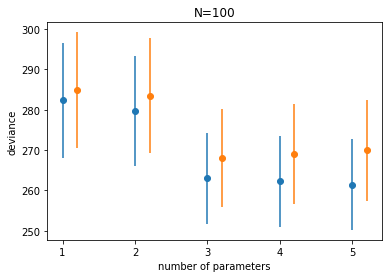

In [80]:
plt.plot(df100.index, df100.train, 'o', color = colors[0])
plt.errorbar(df100.index, df100.train, yerr=df100.train_std, fmt=None, color=colors[0])
plt.plot(df100.index+0.2, df100.test, 'o', color = colors[1])
plt.errorbar(df100.index+0.2, df100.test, yerr=df100.test_std, fmt=None, color=colors[1])
plt.xlabel("number of parameters")
plt.ylabel("deviance")
plt.title("N=100");

In [81]:
df100.test - df100.train

1    2.477941
2    3.721191
3    4.947578
4    6.740764
5    8.432444
dtype: float64